In [3]:
import tensorflow as tf

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, y = make_blobs(n_samples=100,centers=2,random_state=42)
X = tf.constant(X, dtype=np.float64)
y = tf.constant(y.reshape(-1,1), dtype=np.float64)

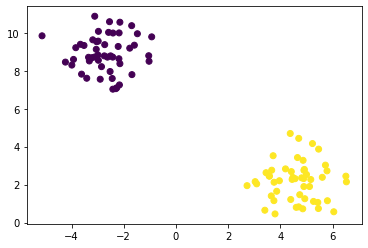

In [5]:
plt.scatter(X[:,0],X[:,1],c = y.numpy().flatten())

# Contruction Phase

In [6]:
#create model paramters with initial values 
W = tf.Variable([X.shape[1],1], dtype=np.float64)
b = tf.Variable(0., dtype=np.float64)

In [7]:
#training info
train_steps = 300
learning_rate = 0.01

In [8]:

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        z = tf.matmul(X,W) + b
        yh = tf.sigmoid(z)
        #calcuate the loss (difference squared error)
        error = -(y*tf.math.log(yh)+(1-y)*tf.math.log(1-yh))
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [9]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

ValueError: in converted code:

    <ipython-input-8-42468a3dec31>:6 train_on_batch  *
        z = tf.matmul(X,W) + b
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:2798 matmul
        a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py:5626 mat_mul
        name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:742 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:3322 _create_op_internal
        op_def=op_def)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1786 __init__
        control_input_ops)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1622 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 2 but is rank 1 for 'MatMul' (op: 'MatMul') with input shapes: [100,2], [2].


In [10]:
loss = train_on_batch(X,y)

ValueError: in converted code:

    <ipython-input-8-42468a3dec31>:6 train_on_batch  *
        z = tf.matmul(X,W) + b
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:2798 matmul
        a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py:5626 mat_mul
        name=name)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:742 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:3322 _create_op_internal
        op_def=op_def)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1786 __init__
        control_input_ops)
    /home/azhad56/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1622 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 2 but is rank 1 for 'MatMul' (op: 'MatMul') with input shapes: [100,2], [2].


ValueError: x and y must be the same size

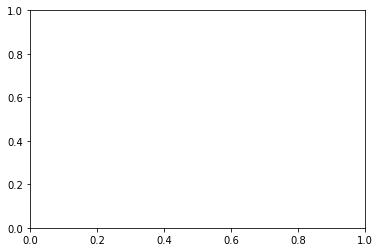

In [11]:
plt.scatter(X, y)
plt.plot(X, b+W*X, color='red')

In [22]:
class Layer:
    def __init__(self,units,inputs,activation):
        self.units = units
        self.inputs = inputs
        self.activation = activation
        self.weights = tf.Variable(tf.zeros([inputs,units],dtype = np.float64))
        self.bias = tf.Variable(tf.zeros([units],dtype=np.float64))
class Model:
    def __init__(self,inputs):
        self.input = inputs
        self.output = inputs
        self.layers = []
    def add_layers(self,units,activation=tf.sigmoid):
        layer = Layer(units,self.output,activation)
        self.layers.append(layer)
        self.output = units
    def predict(self,X):
        a = X
        for layer in self.layers:
            a = layer.activation(tf.matmul(a,layer.weights)+layer.bias)
            layer.result = a
        return a

In [23]:
model = Model(inputs=100)

In [24]:
model.add_layers(50)

In [25]:
model.add_layers(30)

In [26]:
model.add_layers(20)

In [27]:
model.add_layers(1)

In [28]:
X = tf.constant(np.random.randn(500,100))

In [29]:
out = model.predict(X)

In [31]:
out

<tf.Tensor: shape=(500, 1), dtype=float64, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]

In [33]:
model.layers[0].result

<tf.Tensor: shape=(500, 50), dtype=float64, numpy=
array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])>

In [34]:
model.layers[1].result

<tf.Tensor: shape=(500, 30), dtype=float64, numpy=
array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])>

In [35]:
model.layers[2].result

<tf.Tensor: shape=(500, 20), dtype=float64, numpy=
array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])>

In [36]:
model.layers[3].result

<tf.Tensor: shape=(500, 1), dtype=float64, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]